In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('data/earthquakes.csv')

In [2]:
quakes.assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms')
).set_index('time').loc['2018-09-28'].query(
    'parsed_place == "Indonesia" and tsunami and mag == 7.5'
)

,mag,magType,place,tsunami,parsed_place
time,,,,,
2018-09-28 10:02:43.480,7.5,mww,"78km N of Palu, Indonesia",1,Indonesia


<AxesSubplot:xlabel='magType', ylabel='mag'>

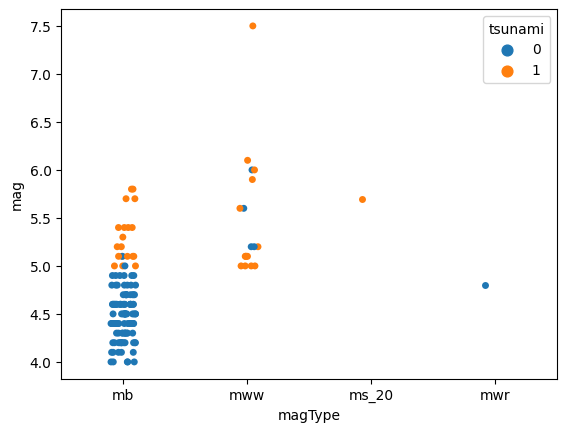

In [4]:
sns.stripplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"')
)

<AxesSubplot:xlabel='magType', ylabel='mag'>

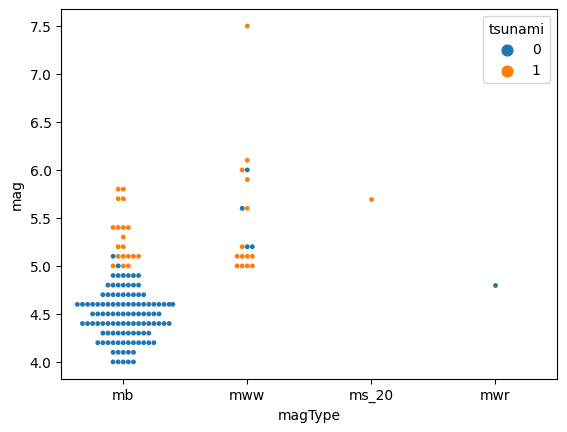

In [5]:
sns.swarmplot(
    x='magType',
    y='mag',
    hue='tsunami',
    data=quakes.query('parsed_place == "Indonesia"'),
    size=3.5 # point size
)

Text(0.5, 1.0, 'Comparing earthquake magnitude by magType')

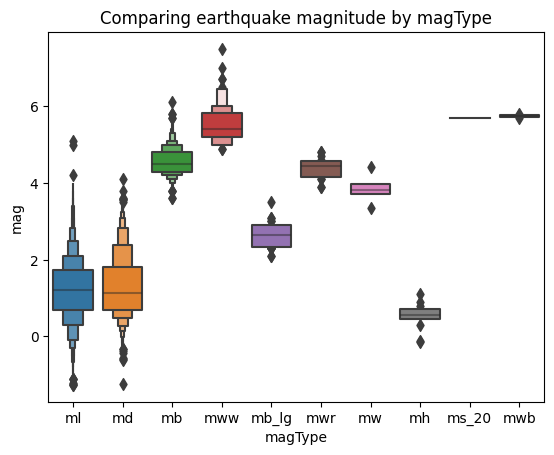

In [6]:
sns.boxenplot(
    x='magType', y='mag', data=quakes[['magType', 'mag']]
)
plt.title('Comparing earthquake magnitude by magType')

Text(0.5, 1.0, 'Comparing earthquake magnitude by magType')

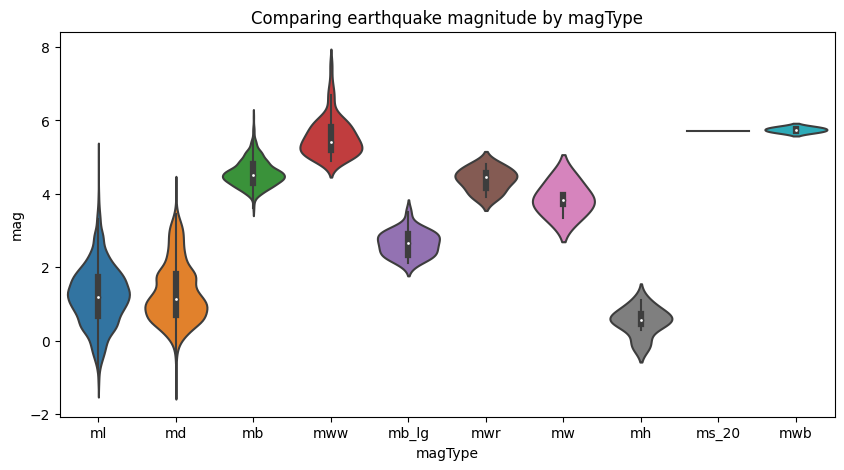

In [7]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.violinplot(
    x='magType', y='mag', data=quakes[['magType', 'mag']],  
    ax=axes, scale='width' # all violins have same width
)
plt.title('Comparing earthquake magnitude by magType')

<AxesSubplot:>

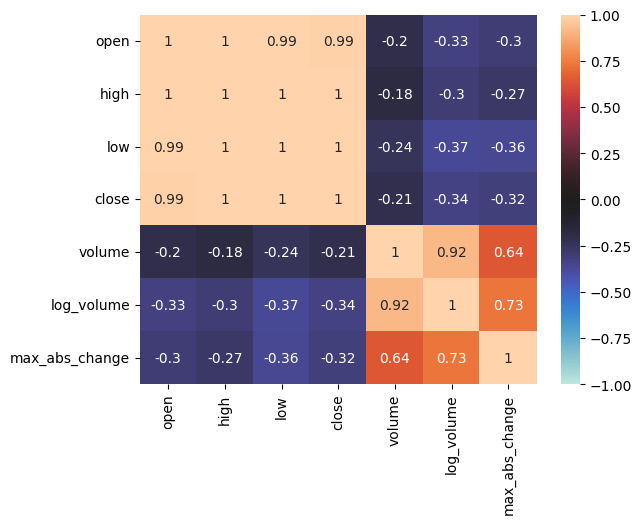

In [8]:
sns.heatmap(
    fb.sort_index().assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    ).corr(),
    annot=True, center=0, vmin=-1, vmax=1
)

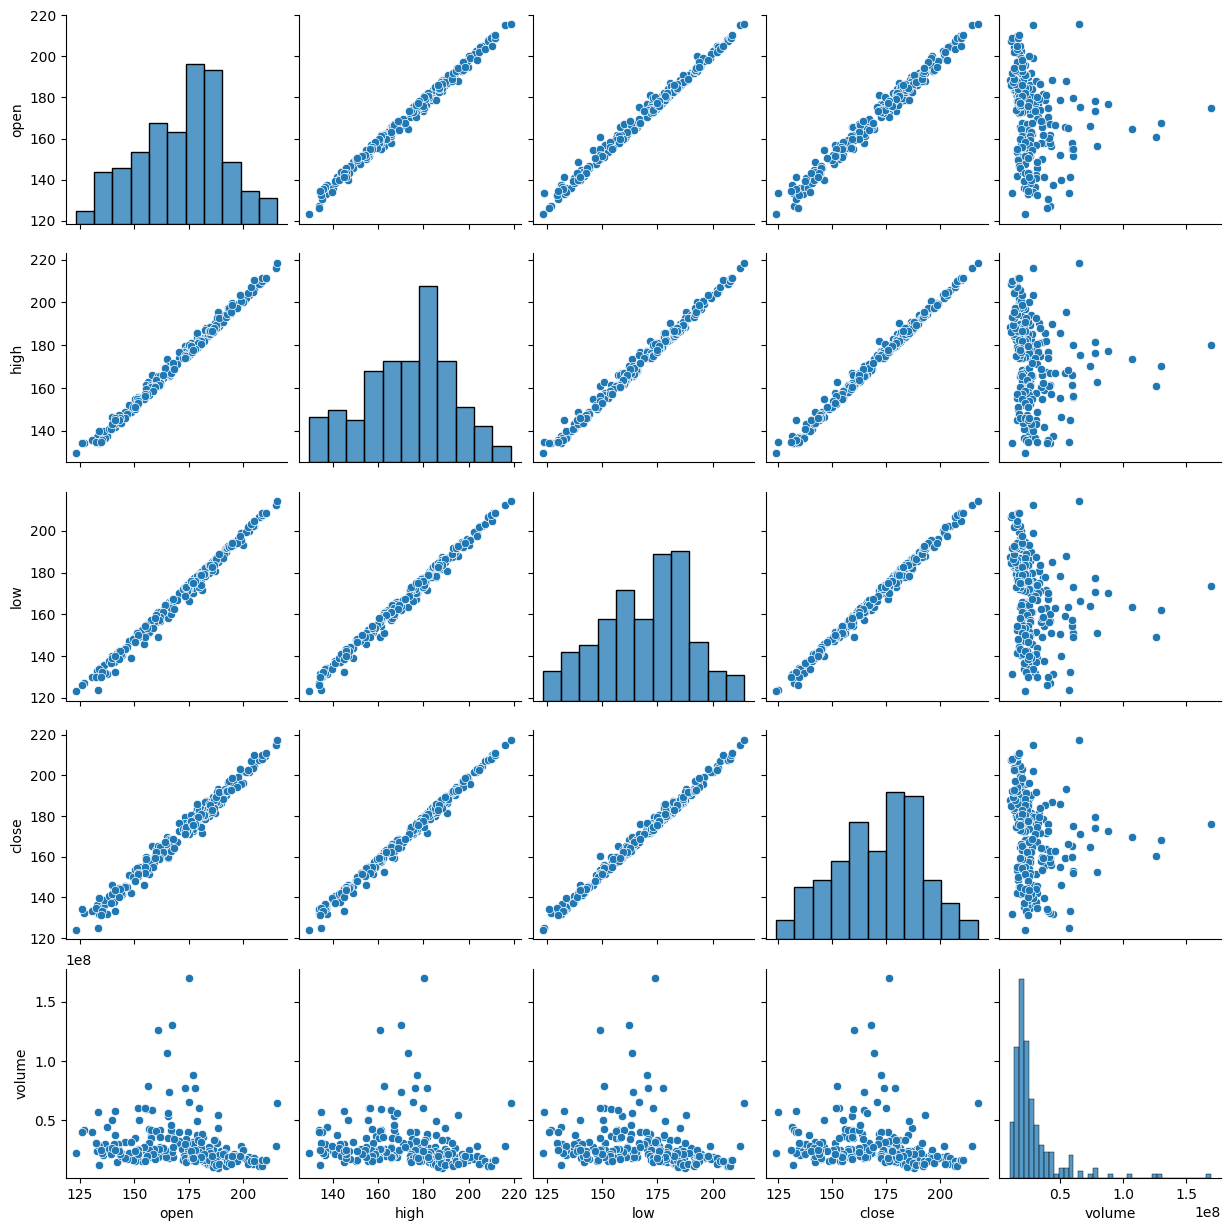

In [9]:
sns.pairplot(fb)

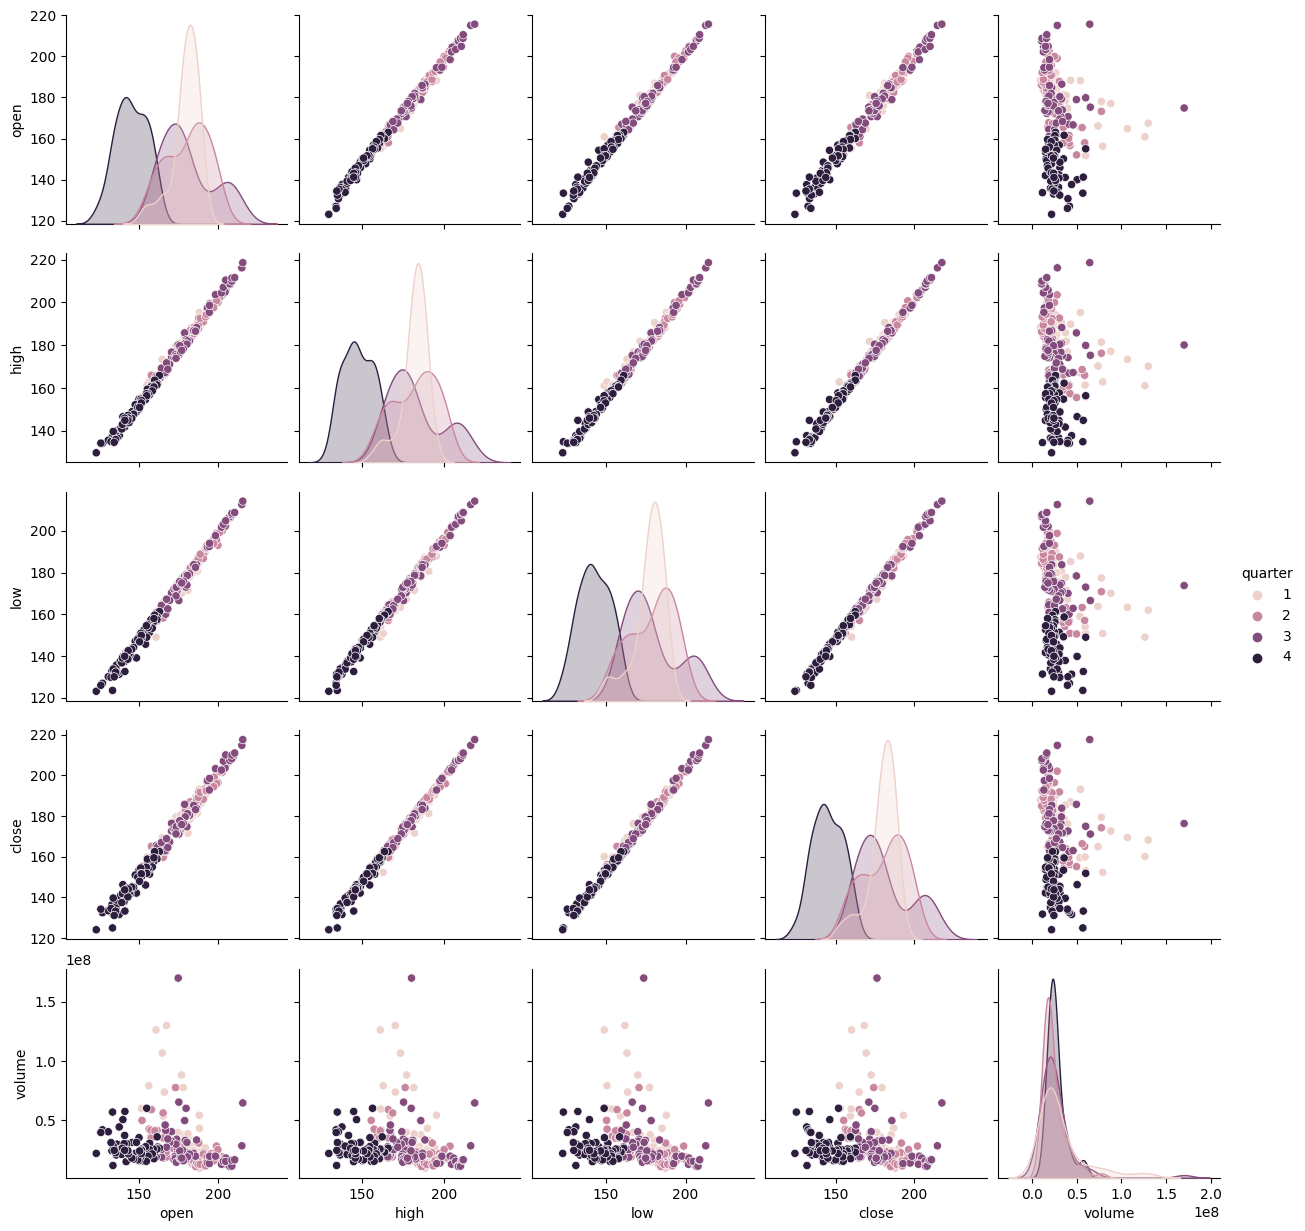

In [10]:
sns.pairplot(
    fb.assign(quarter=lambda x: x.index.quarter),
    diag_kind='kde',
    hue='quarter'
)

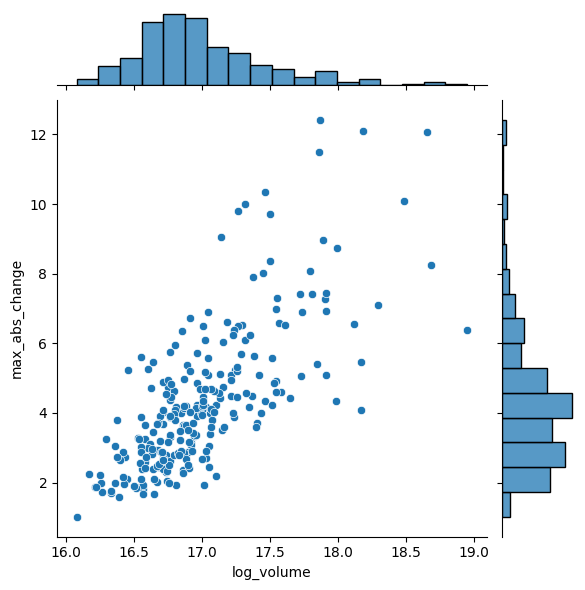

In [11]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

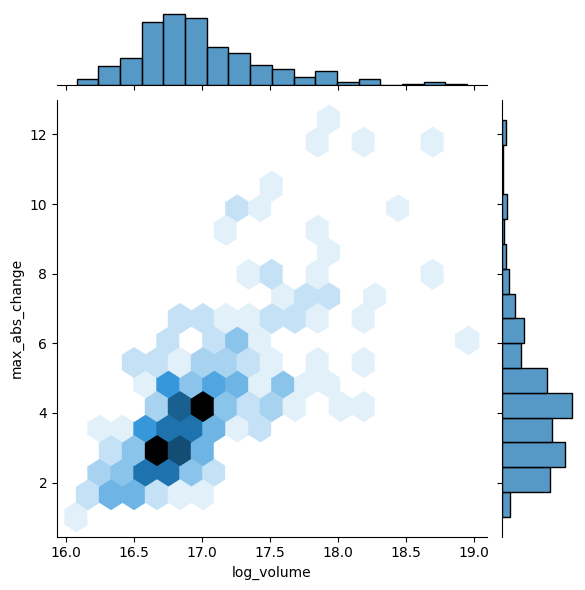

In [12]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='hex',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

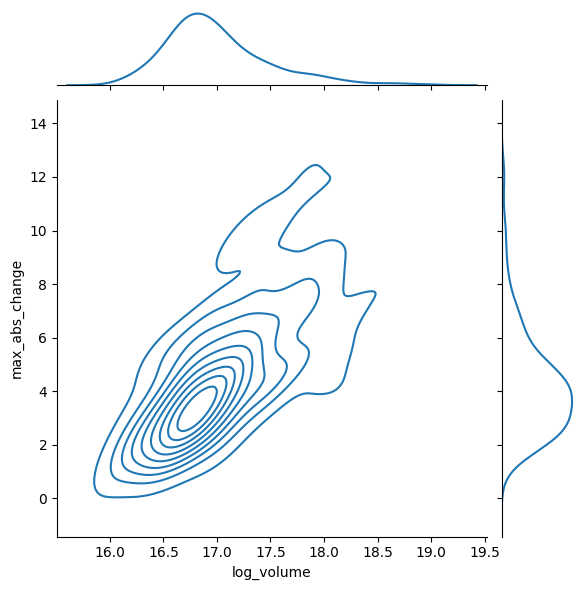

In [13]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='kde',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

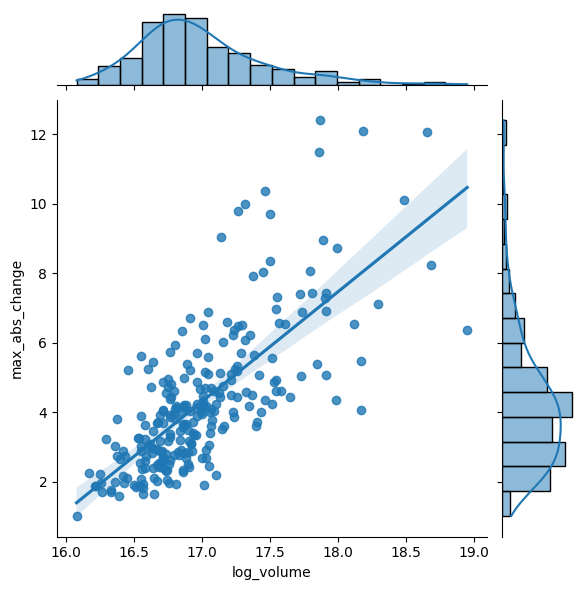

In [14]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='reg',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

Text(468.01587301587307, 0.5, 'residuals')

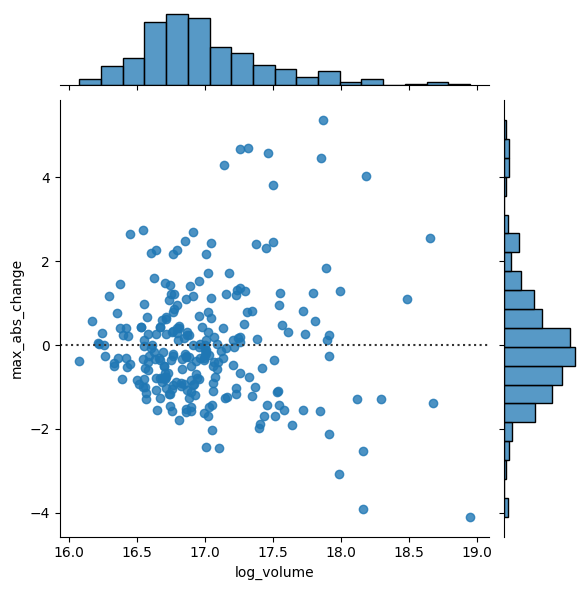

In [15]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    kind='resid',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)
# update y-axis label (discussed in the next notebook)
plt.ylabel('residuals')

In [16]:
fb_reg_data = fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).iloc[:,-2:]

In [17]:
import itertools

In [18]:
iterator = itertools.repeat("I'm an iterator", 1)

for i in iterator:
    print(f'-->{i}')
print('This printed once because the iterator has been exhausted')
for i in iterator:
    print(f'-->{i}')

-->I'm an iterator
This printed once because the iterator has been exhausted


In [19]:
iterable = list(itertools.repeat("I'm an iterable", 1))

for i in iterable:
    print(f'-->{i}')
print('This prints again because it\'s an iterable:')
for i in iterable:
    print(f'-->{i}')

-->I'm an iterable
This prints again because it's an iterable:
-->I'm an iterable


In [20]:
from viz import reg_resid_plots
reg_resid_plots??

Signature: reg_resid_plots(data)
Source:   
def reg_resid_plots(data):
    """
    Using `seaborn`, plot the regression and residuals plots
    side-by-side for every permutation of 2 columns in the data.
    
    Parameters:
        - data: A `pandas.DataFrame`

    Returns:
        A matplotlib `Axes` object.
    """
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)

    fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))

    for (x, y), axes, color in zip(
        itertools.permutations(data.columns, 2), 
        ax,
        itertools.cycle(['royalblue', 'darkorange'])
    ):
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=color)

            if func == sns.residplot:
                # mark the residuals as such
                subplot.set_ylabel('residuals')
    return fig.axes
File:      c:\users\marc\downloads\itec6720\ch_06\viz.py
Type:      function

[<AxesSubplot:xlabel='log_volume', ylabel='max_abs_change'>,
 <AxesSubplot:xlabel='log_volume', ylabel='residuals'>,
 <AxesSubplot:xlabel='max_abs_change', ylabel='log_volume'>,
 <AxesSubplot:xlabel='max_abs_change', ylabel='residuals'>]

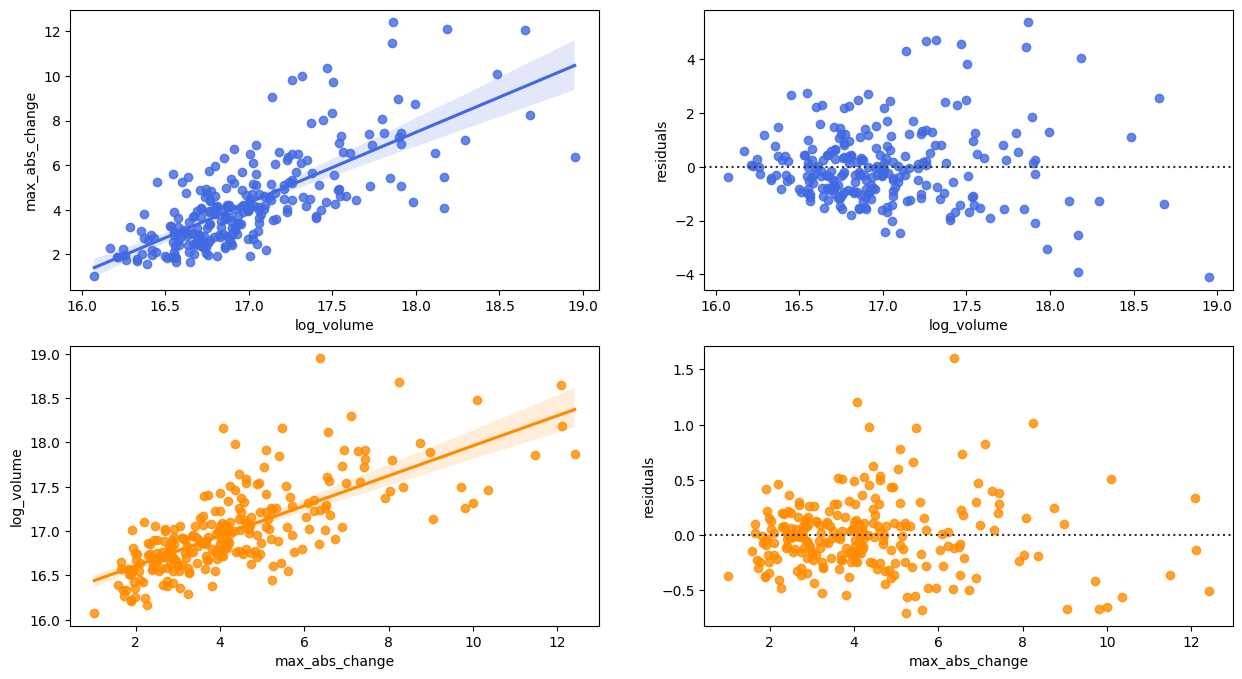

In [21]:
from viz import reg_resid_plots
reg_resid_plots(fb_reg_data)

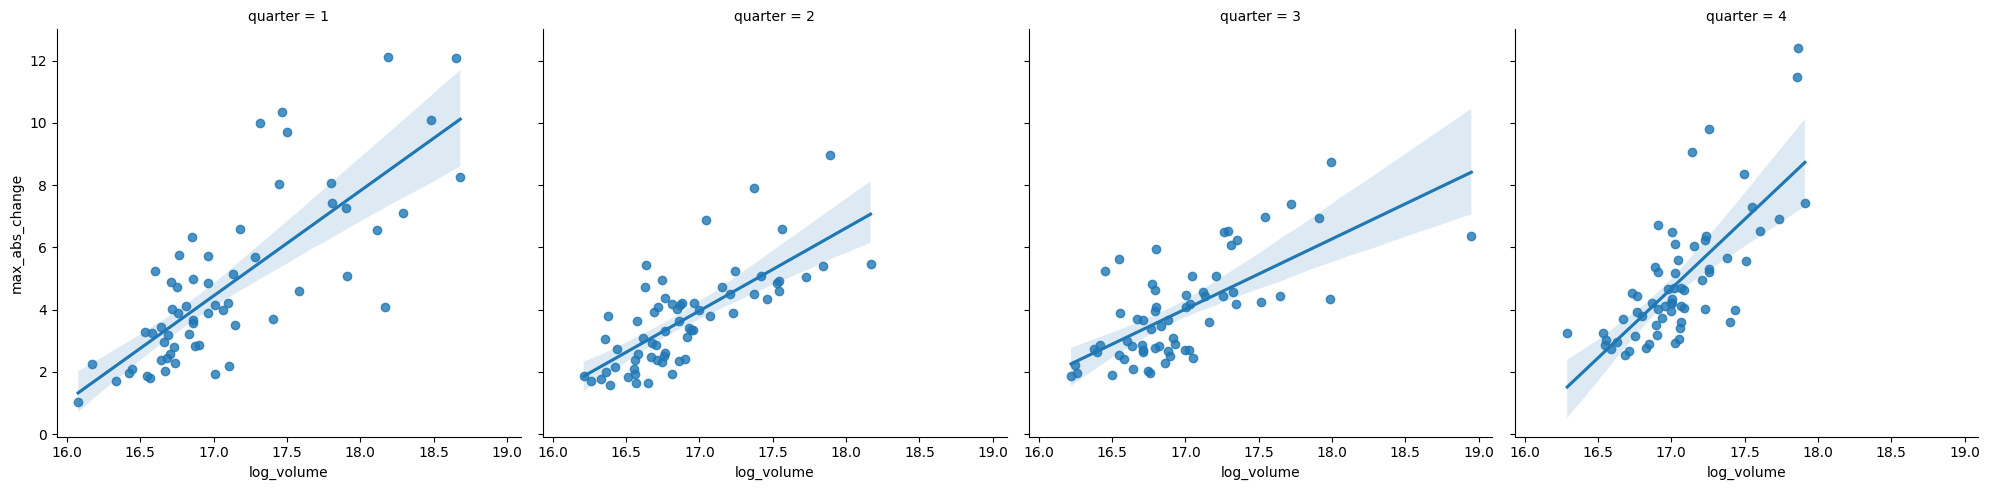

In [22]:
sns.lmplot(
    x='log_volume',
    y='max_abs_change',
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low,
        quarter=lambda x: x.index.quarter
    ),
    col='quarter'
)

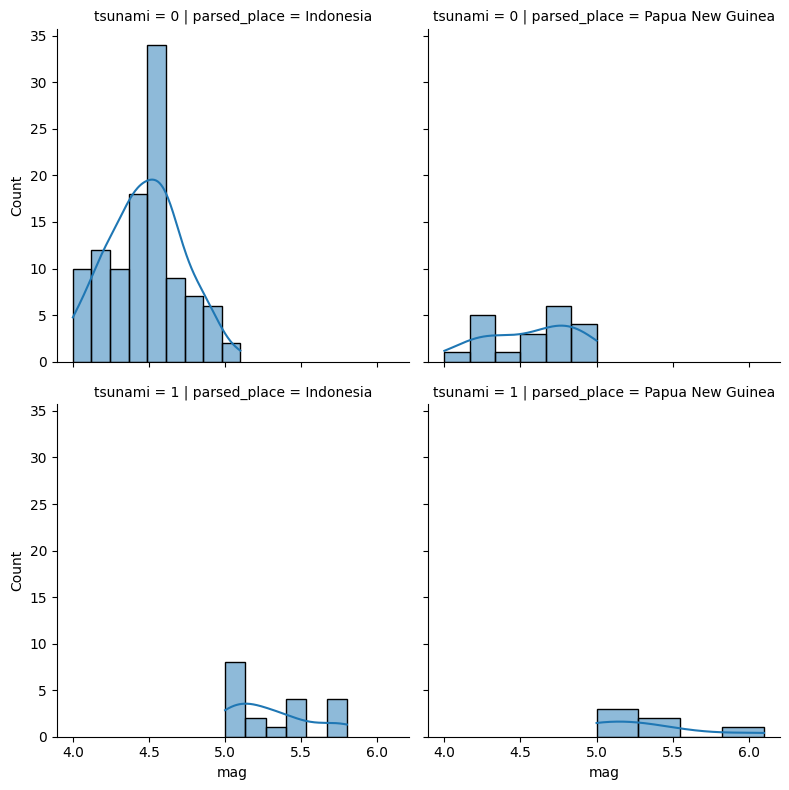

In [23]:
g = sns.FacetGrid(
    quakes.query(
        'parsed_place.isin(["Indonesia", "Papua New Guinea"]) '
        'and magType == "mb"'
    ),
    row='tsunami',
    col='parsed_place',
    height=4
)
g = g.map(sns.histplot, 'mag', kde=True)

The first section in chapter 6 introduces seaborn as a tool for creating more dynamic and elaborate graphs to represent data. The first commands include stripplot, swarmplot, boxenplot, and viloinplot. Thse are all fancier versions of what we saw with matplotlib and pandas. Pairplot was used to show correlations and heatmaps. Jointplot allowed the plotting of multiple data sections on the same graph using a combination of visual representations. The final part discusses regression plots and facetting. 

Question 1:  Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami for earthquakes measured with the mb magnitude type

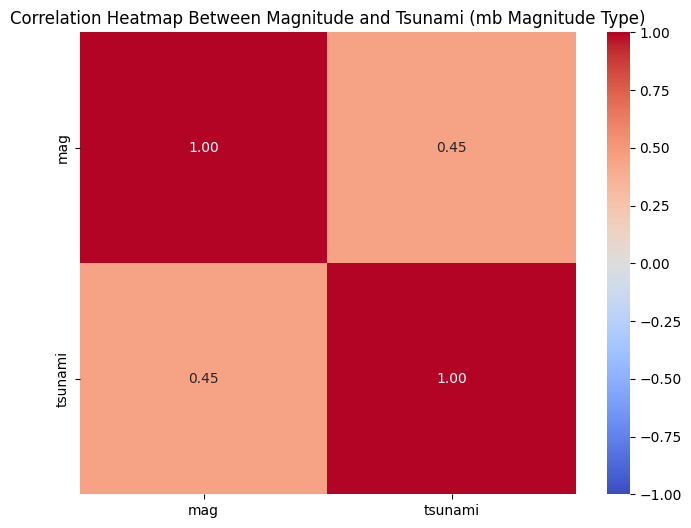

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

quakes = pd.read_csv('data/earthquakes.csv')

mb_quakes = quakes[quakes['magType'] == 'mb']

data = mb_quakes[['mag', 'tsunami']].copy()  # Create a copy to avoid SettingWithCopyWarning

data.loc[:, 'tsunami'] = data['tsunami'].astype(int)

correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

plt.title('Correlation Heatmap Between Magnitude and Tsunami (mb Magnitude Type)')
plt.show()


Question 2:  Create a box plot of Facebook volume traded and closing prices, and draw reference
lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be
at Q1 − 1.5 × IQR and Q3 + 1.5 × IQR. Be sure to use the quantile() method on
the data to make this easier. (Pick whichever orientation you prefer for the plot, but
make sure to use subplots.)

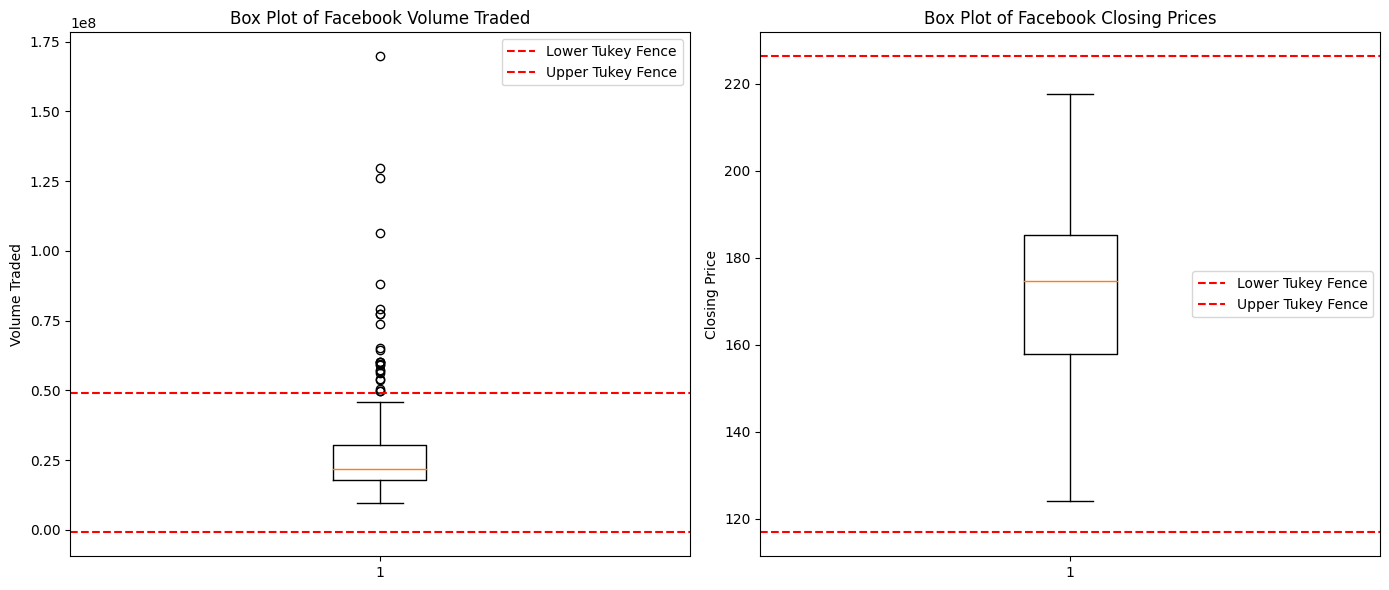

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

fb = pd.read_csv('data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

def tukey_fence_bounds(series, multiplier=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return lower_bound, upper_bound

volume_lower, volume_upper = tukey_fence_bounds(fb['volume'])

close_lower, close_upper = tukey_fence_bounds(fb['close'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].boxplot(fb['volume'])
axes[0].set_title('Box Plot of Facebook Volume Traded')
axes[0].set_ylabel('Volume Traded')
axes[0].axhline(volume_lower, color='r', linestyle='--', label='Lower Tukey Fence')
axes[0].axhline(volume_upper, color='r', linestyle='--', label='Upper Tukey Fence')
axes[0].legend()

axes[1].boxplot(fb['close'])
axes[1].set_title('Box Plot of Facebook Closing Prices')
axes[1].set_ylabel('Closing Price')
axes[1].axhline(close_lower, color='r', linestyle='--', label='Lower Tukey Fence')
axes[1].axhline(close_upper, color='r', linestyle='--', label='Upper Tukey Fence')
axes[1].legend()

plt.tight_layout()

plt.show()


Question 3: Plot the evolution of cumulative COVID-19 cases worldwide, and add a dashed
vertical line on the date that it surpassed 1 million. Be sure to format the tick labels
on the y-axis accordingly

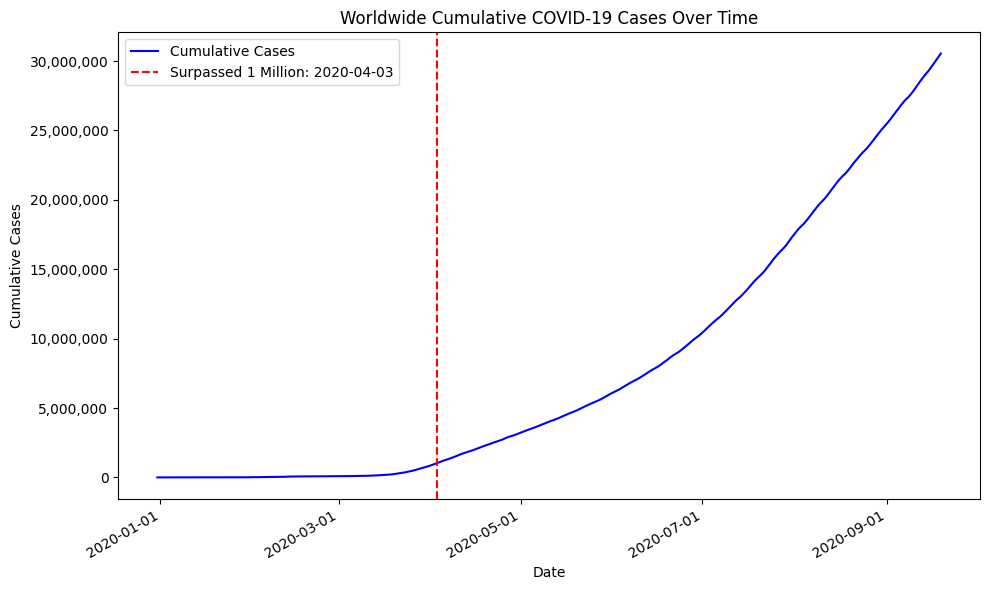

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

file_path = 'data/covid19_cases.csv'
df = pd.read_csv(file_path)

df['dateRep'] = pd.to_datetime(df['dateRep'], format='%d/%m/%Y')

daily_aggregates = df.groupby('dateRep').agg({'cases': 'sum'}).reset_index()

daily_aggregates['Cumulative_cases'] = daily_aggregates['cases'].cumsum()

one_million_date = daily_aggregates[daily_aggregates['Cumulative_cases'] >= 1_000_000].iloc[0]['dateRep']

plt.figure(figsize=(10, 6))

plt.plot(daily_aggregates['dateRep'], daily_aggregates['Cumulative_cases'], label='Cumulative Cases', color='blue')

plt.axvline(x=one_million_date, color='red', linestyle='--', label=f'Surpassed 1 Million: {one_million_date.date()}')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gcf().autofmt_xdate()  # Auto-format the date labels

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('Worldwide Cumulative COVID-19 Cases Over Time')

plt.legend()

plt.tight_layout()
plt.show()
